In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("bank-additional-full.csv", delimiter=";")

# Drop irrelevant columns
data = data.drop(["duration"], axis=1)

# Replace unknown values with NaN
data = data.replace("unknown", np.nan)
print(data.tail())
# Convert categorical variables to numerical
data["job"] = data["job"].astype("category").cat.codes
data["marital"] = data["marital"].astype("category").cat.codes
data["contact"] = data["contact"].astype("category").cat.codes
data["education"] = data["education"].astype("category").cat.codes
data["default"] = data["default"].astype("category").cat.codes
data["housing"] = data["housing"].astype("category").cat.codes
data["loan"] = data["loan"].astype("category").cat.codes
data["month"] = data["month"].astype("category").cat.codes
data["poutcome"] = data["poutcome"].astype("category").cat.codes
data["day_of_week"] = data["day_of_week"].astype("category").cat.codes
data["y"] = data["y"].astype("category").cat.codes

# Impute missing values with column means
data = data.fillna(data.mean())

# Split into features and target
x = data.drop(["y"], axis=1)
y = data["y"]

       age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  campaign  pdays  previous     poutcome  \
41183  cellular   nov         fri         1    999         0  nonexistent   
41184  cellular   nov         fri         1    999         0  nonexistent   
41185  cellular   nov         fri         2    999         0  nonexistent   
41186  cellular   nov         fri         1    999         0  nonexistent   
41187  cellular   nov         fri         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.em

In [3]:
# summary of data
data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.628435,1.165000,3.410969,-0.208653,0.499806,0.127659,0.365252,4.230868,2.004613,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.558984,0.611053,2.225748,0.406530,0.545967,0.399297,0.481507,2.320025,1.397575,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


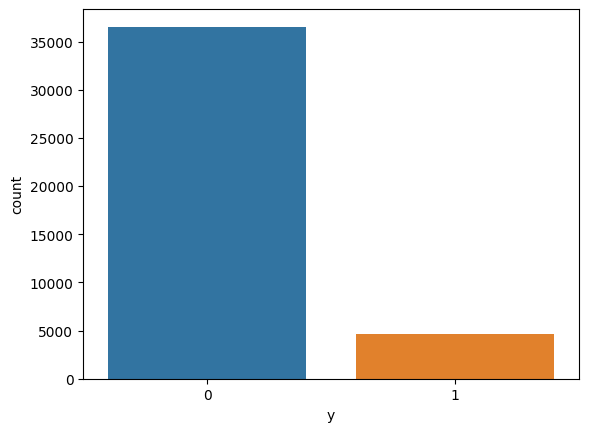

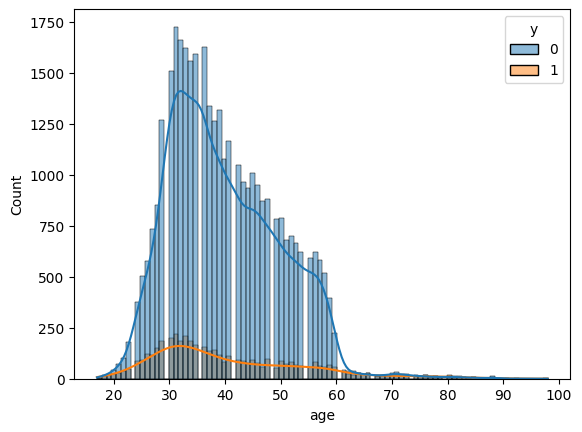

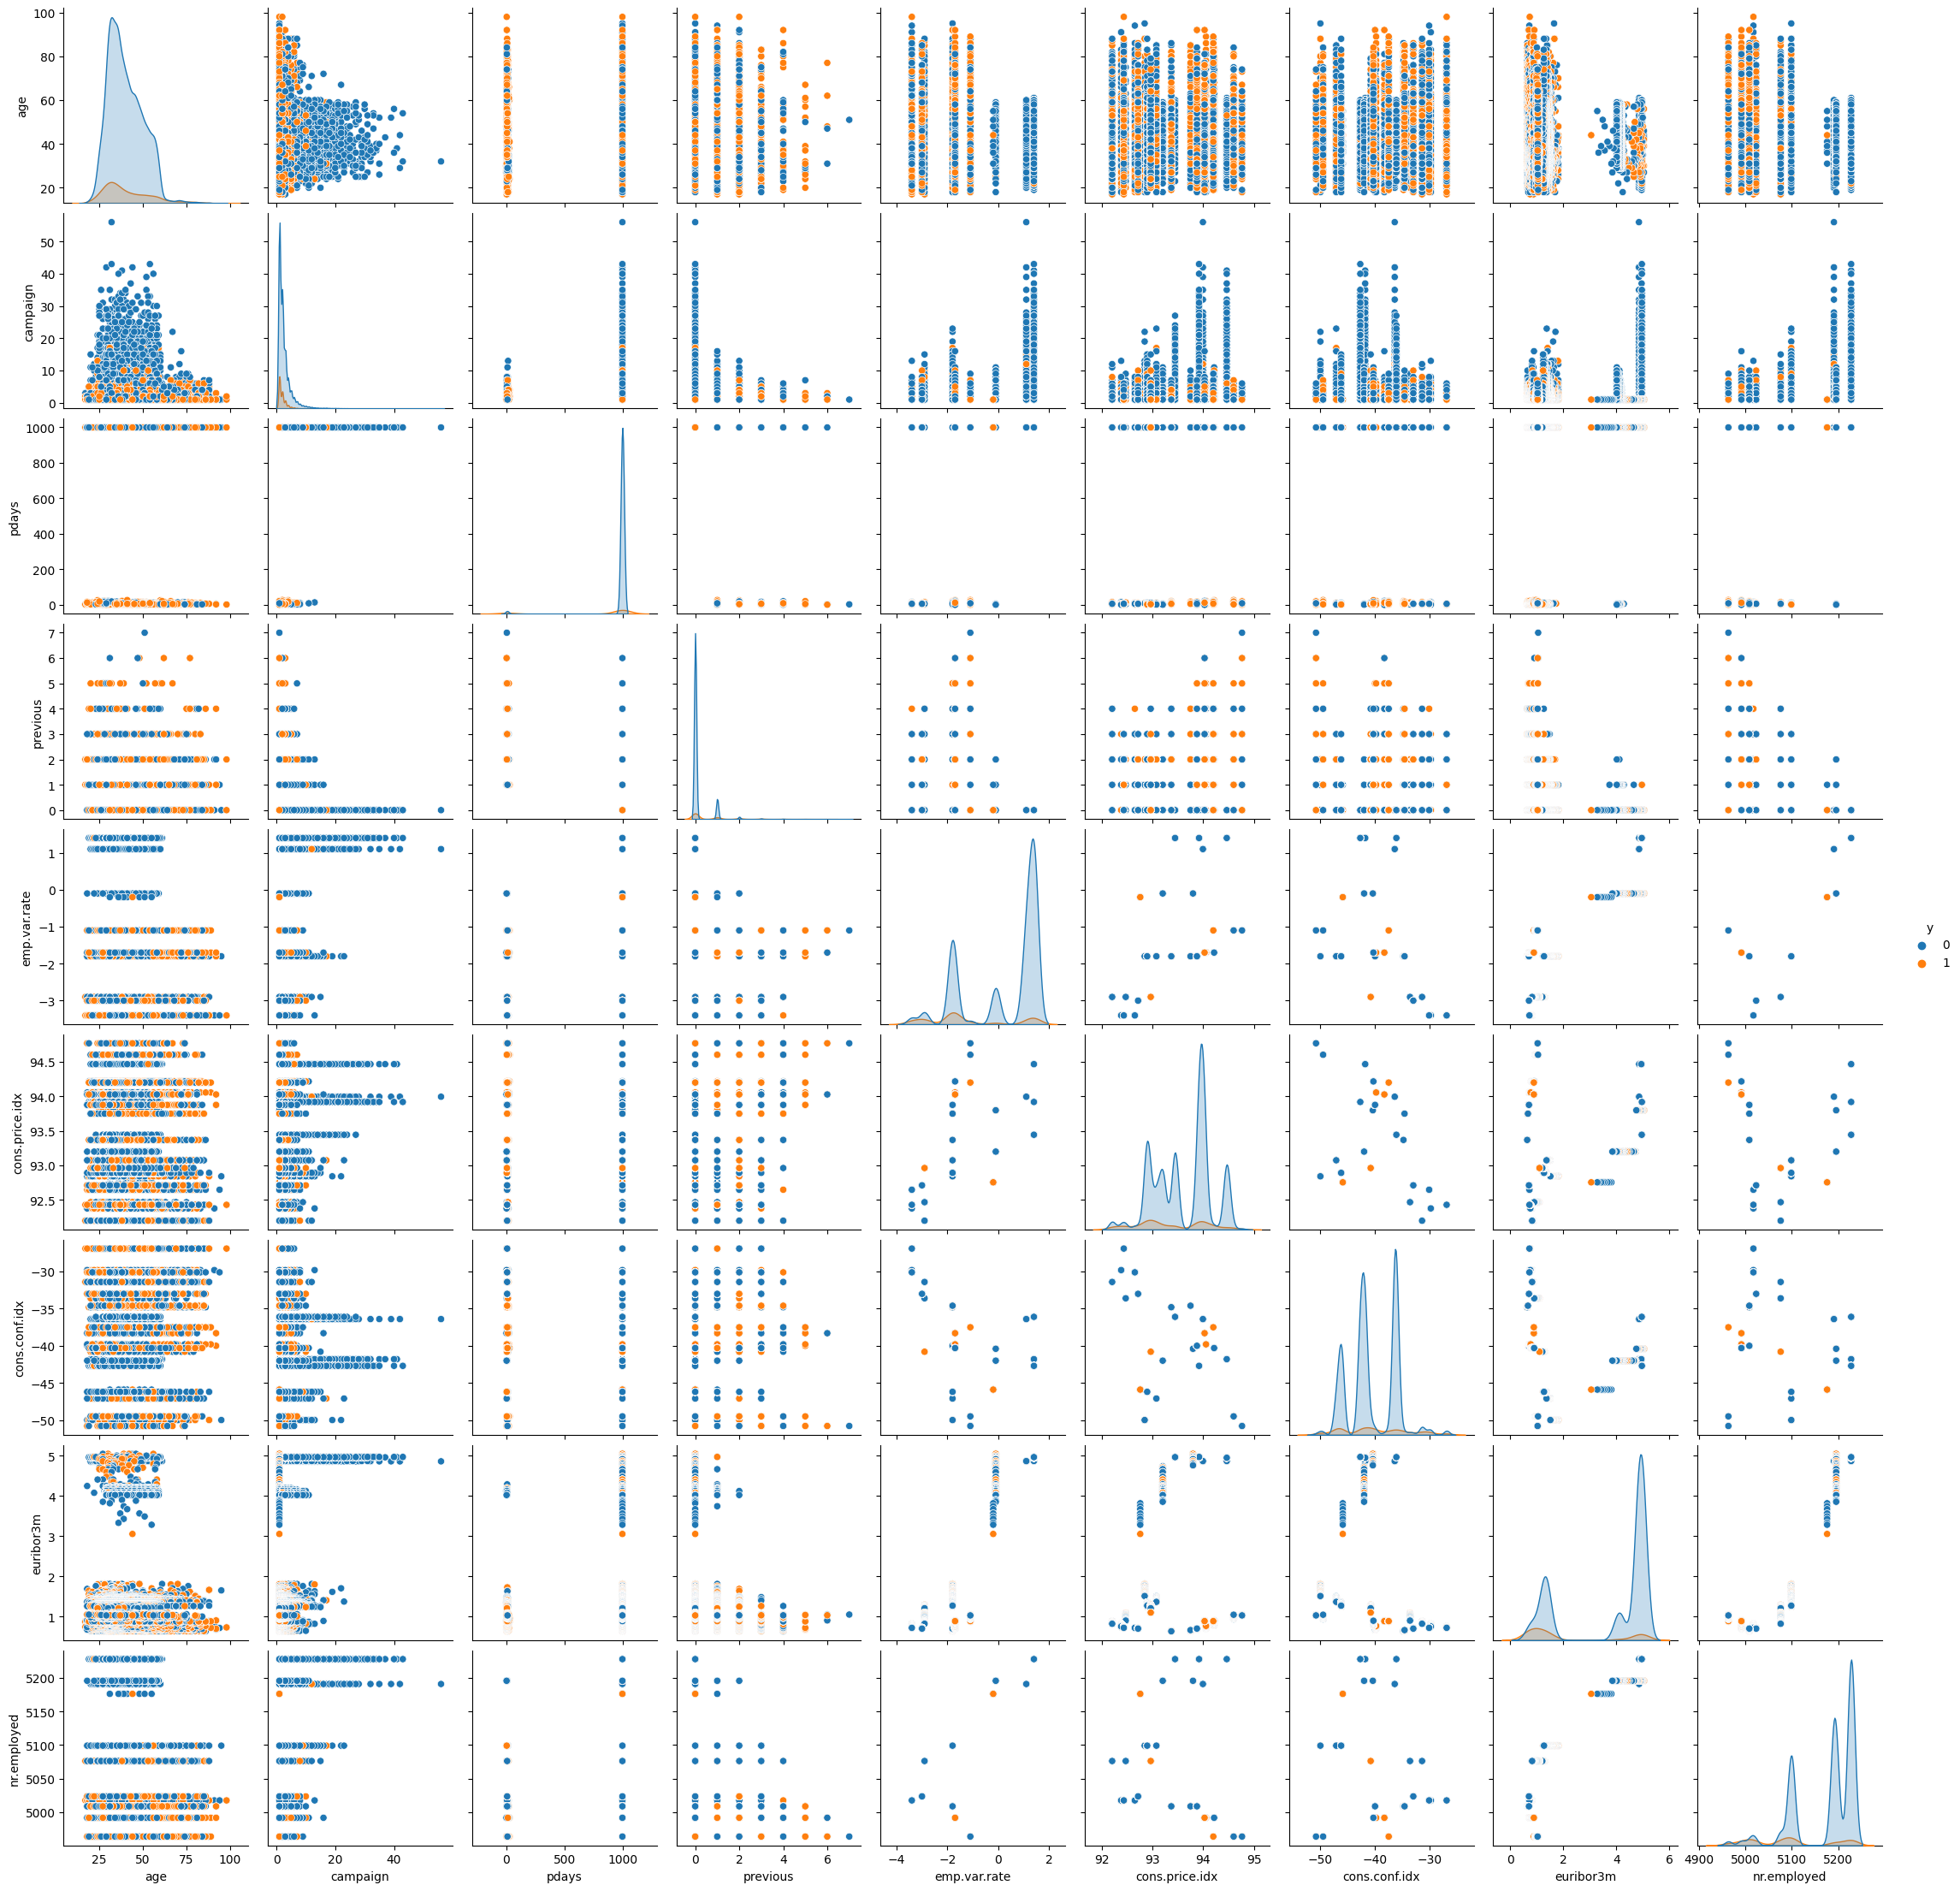

In [15]:
# Data visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=data)
plt.show()

sns.histplot(data=data, x="age", hue="y", kde=True)
plt.show()

sns.pairplot(data, vars=["age", "campaign", "pdays", "previous", "emp.var.rate","cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"], hue="y")
plt.show()


In [16]:
#Value Counts of Categorical Variables
cat_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "day_of_week"]

for var in cat_vars:
    print(data[var].value_counts())

 0     10422
 1      9254
 9      6743
 7      3969
 4      2924
 5      1720
 2      1456
 6      1421
 3      1060
 10     1014
 8       875
-1       330
Name: job, dtype: int64
 1    24928
 2    11568
 0     4612
-1       80
Name: marital, dtype: int64
 6    12168
 3     9515
 2     6045
 5     5243
 0     4176
 1     2292
-1     1731
 4       18
Name: education, dtype: int64
 0    32588
-1     8597
 1        3
Name: default, dtype: int64
 1    21576
 0    18622
-1      990
Name: housing, dtype: int64
 0    33950
 1     6248
-1      990
Name: loan, dtype: int64
0    26144
1    15044
Name: contact, dtype: int64
6    13769
3     7174
1     6178
4     5318
7     4101
0     2632
8      718
9      570
5      546
2      182
Name: month, dtype: int64
1    35563
0     4252
2     1373
Name: poutcome, dtype: int64
2    8623
1    8514
4    8134
3    8090
0    7827
Name: day_of_week, dtype: int64


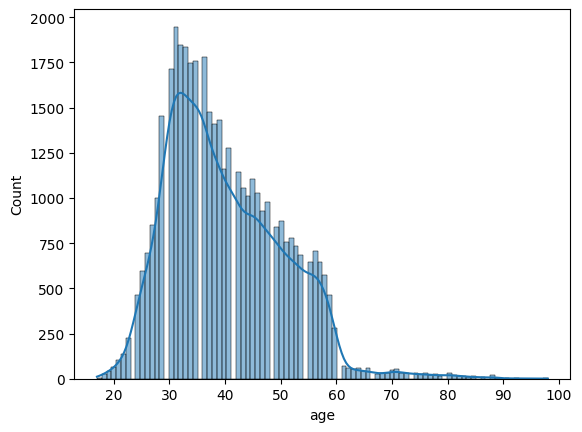

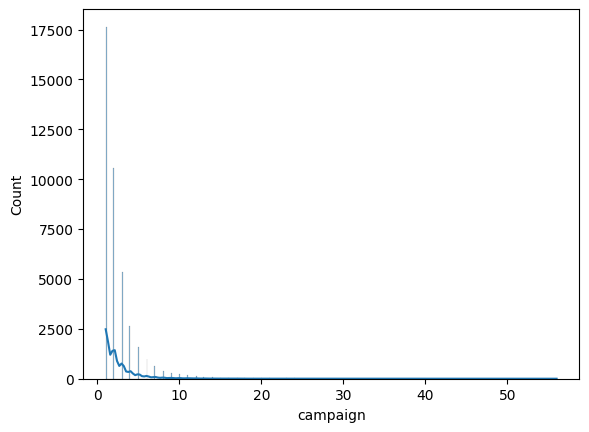

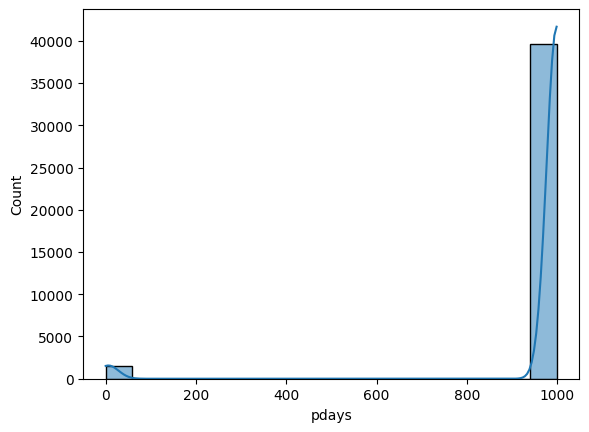

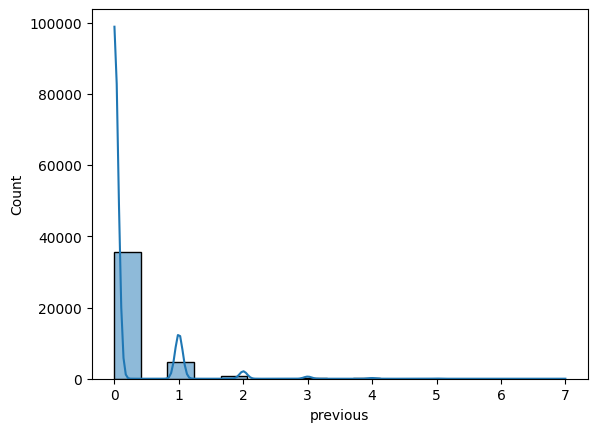

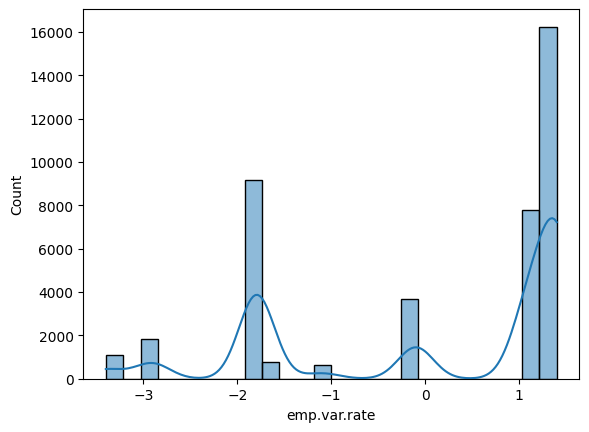

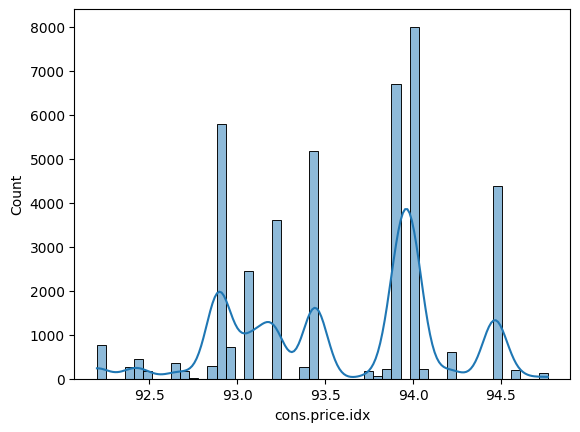

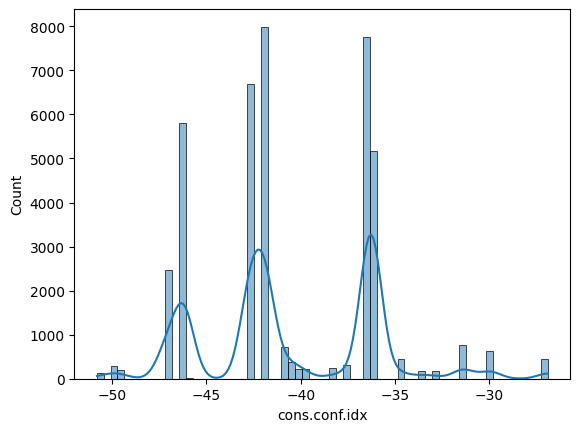

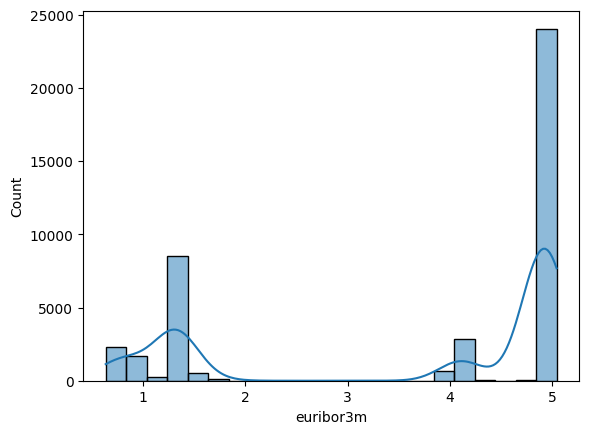

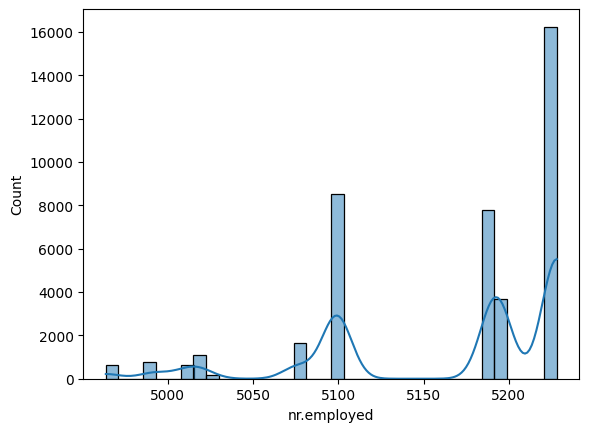

In [17]:
#Distribution of Numeric Variables
numeric_vars = ["age", "campaign", "pdays", "previous", "emp.var.rate","cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"]

for var in numeric_vars:
    sns.histplot(data[var], kde=True)
    plt.show()

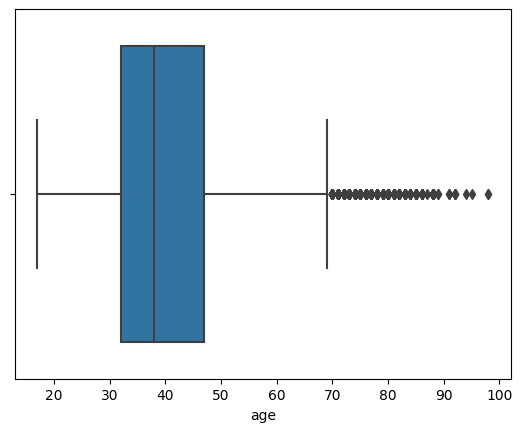

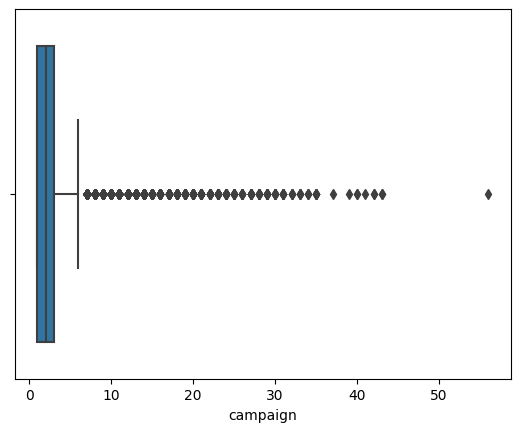

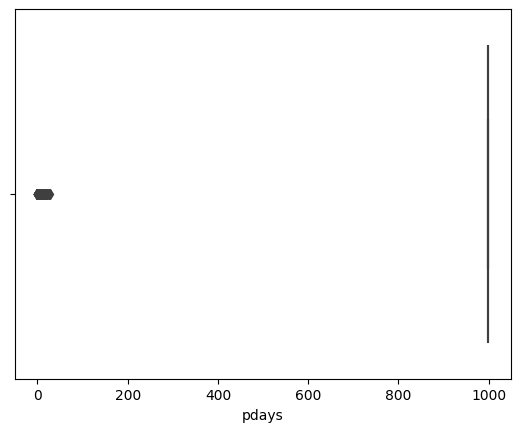

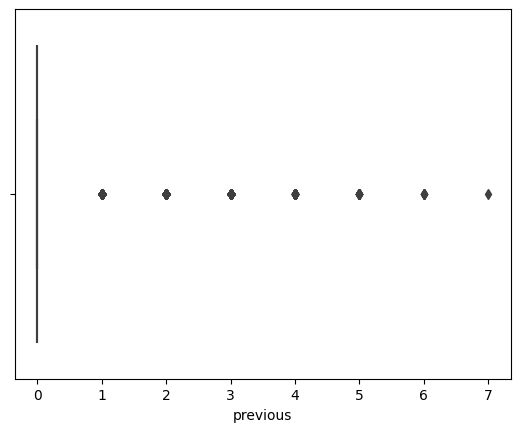

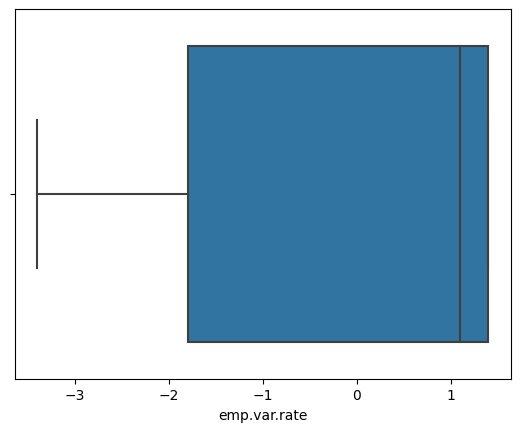

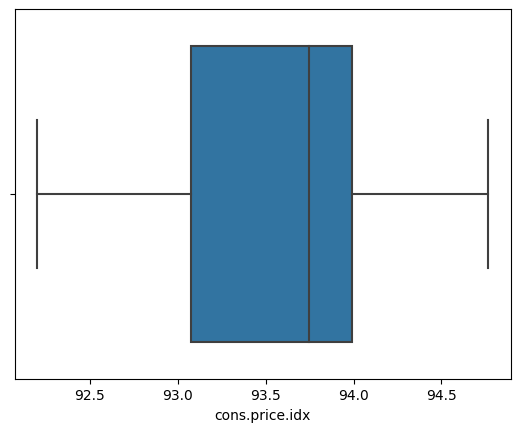

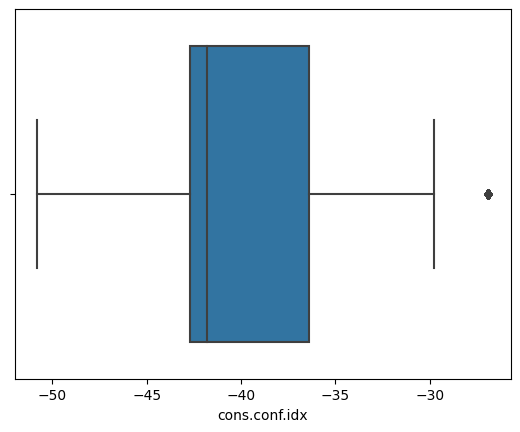

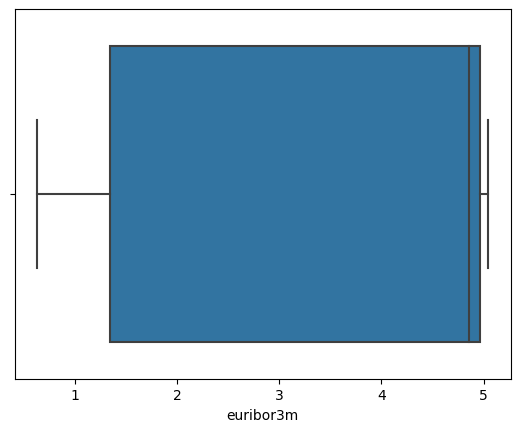

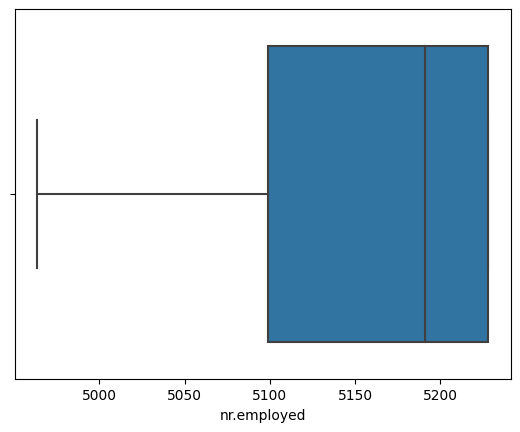

In [18]:
#Outlier Detection
for var in numeric_vars:
    sns.boxplot(x=data[var])
    plt.show()

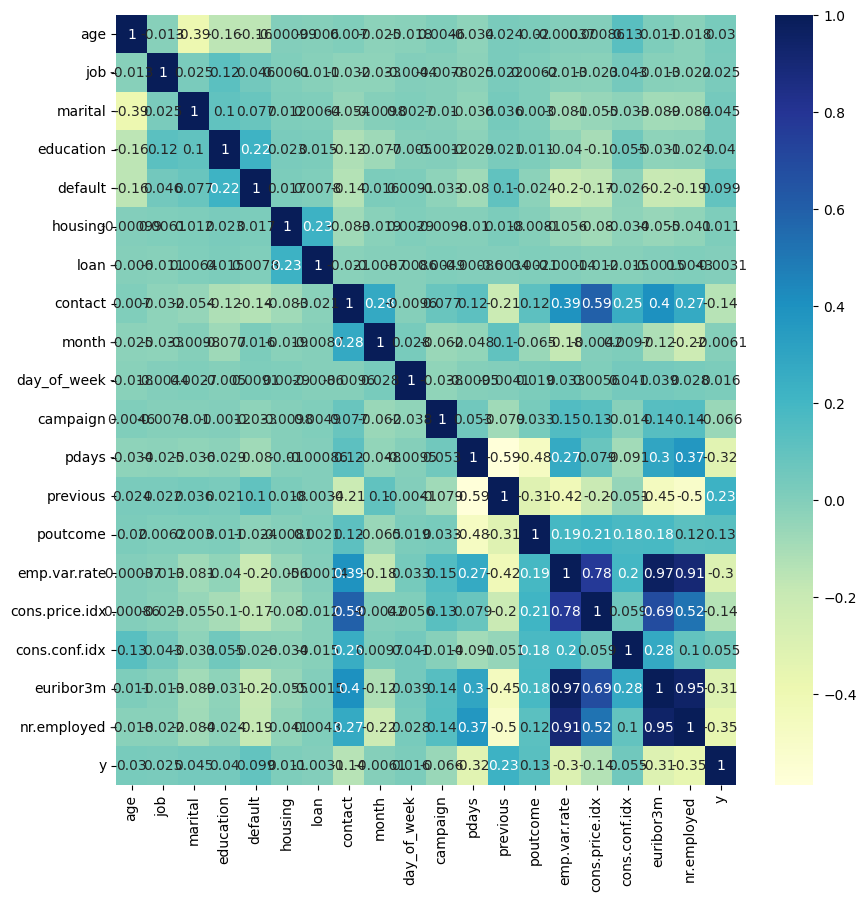

In [7]:
# feature selection, heatmap 
import numpy as np
import matplotlib.pyplot as plt

corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", ax=ax)
plt.show()


Feature: age, Score: 0.18627
Feature: job, Score: 0.08425
Feature: marital, Score: 0.04203
Feature: education, Score: 0.07346
Feature: default, Score: 0.01417
Feature: housing, Score: 0.04139
Feature: loan, Score: 0.02791
Feature: contact, Score: 0.01457
Feature: month, Score: 0.01762
Feature: day_of_week, Score: 0.05821
Feature: campaign, Score: 0.08775
Feature: pdays, Score: 0.04150
Feature: previous, Score: 0.01658
Feature: poutcome, Score: 0.03901
Feature: emp.var.rate, Score: 0.02344
Feature: cons.price.idx, Score: 0.02370
Feature: cons.conf.idx, Score: 0.02707
Feature: euribor3m, Score: 0.13292
Feature: nr.employed, Score: 0.04817


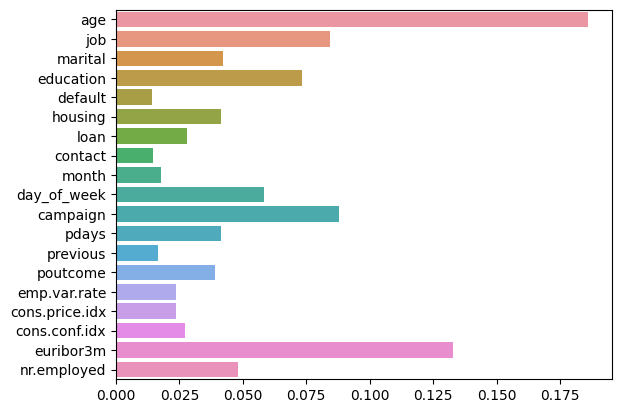

In [8]:
# feature importance visuallization
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x, y)

importance = rf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (x.columns[i],v))
    
sns.barplot(x=importance, y=x.columns)
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier




class Models():

        def get_random_forest_model(self):
          return RandomForestClassifier(n_estimators=100, random_state=2)

        def get_svm_model(self):
          return SVC(kernel='linear', C=0.1, random_state=2)

        def get_xgboost_model(self):
          return XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=2)

        def get_decision_tree_model(self):
          return DecisionTreeClassifier(random_state=2)

In [10]:
# split data and normalizing them
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
scaler = StandardScaler()

# fit scaler on x_train
scaler.fit(x_train)

# transform x_train and x_test using scaler
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = Models()

# Create a list of models to evaluate
model_list = [models.get_random_forest_model(), models.get_svm_model(), models.get_xgboost_model(), models.get_decision_tree_model()]

# Evaluate each model using cross-validation
for model in model_list:
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)
    print("Model:", type(model).__name__)
    print("CV Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))

# Select the best model based on evaluation metrics on test set
best_model = None
best_score = 0

for model in model_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model:", type(model).__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Update best model
    if f1 > best_score:
        best_model = model
        best_score = f1

print("Best Model:", type(best_model).__name__)
print("Best F1 Score:", best_score)

Model: RandomForestClassifier
CV Scores: [0.88831563 0.89362671 0.89362671 0.89742033 0.88892261]
Mean CV Score: 0.8923823975720788
Model: SVC
CV Scores: [0.89377845 0.89757208 0.89924127 0.89863429 0.89499241]
Mean CV Score: 0.8968437025796663
Model: XGBClassifier
CV Scores: [0.89878604 0.90015175 0.89984825 0.9        0.89893778]
Mean CV Score: 0.899544764795144
Model: DecisionTreeClassifier
CV Scores: [0.83808801 0.83641882 0.83034901 0.84522003 0.83383915]
Mean CV Score: 0.8367830045523519
Model: RandomForestClassifier
Accuracy: 0.8943918426802622
Precision: 0.5508130081300813
Recall: 0.29456521739130437
F1 Score: 0.38385269121813037
Model: SVC
Accuracy: 0.9002184996358339
Precision: 0.6828358208955224
Recall: 0.19891304347826086
F1 Score: 0.30808080808080807
Model: XGBClassifier
Accuracy: 0.9036173828599174
Precision: 0.6779661016949152
Recall: 0.2608695652173913
F1 Score: 0.3767660910518053
Model: DecisionTreeClassifier
Accuracy: 0.8418305413935421
Precision: 0.3023735810113519
R

In [ ]:
# hyper parameter engineering
from sklearn.model_selection import GridSearchCV

models = Models()

# Define parameter grid for each model
rf_param_grid = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 15]}
svm_param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
xgb_param_grid = {"learning_rate": [0.1, 0.2, 0.3], "max_depth": [5, 10, 15], "n_estimators": [50, 100, 200]}
dt_param_grid = {"max_depth": [5, 10, 15]}

# Create a list of parameter grids for each model
param_grid_list = [rf_param_grid, svm_param_grid, xgb_param_grid, dt_param_grid]

# Create a list of models to tune
model_list = [models.get_random_forest_model(), models.get_svm_model(), models.get_xgboost_model(), models.get_decision_tree_model()]

# Perform grid search for each model
best_models = []
for i in range(len(model_list)):
    grid_search = GridSearchCV(estimator=model_list[i], param_grid=param_grid_list[i], cv=5)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    print("Model:", type(best_model).__name__)
    print("Best Parameters:", grid_search.best_params_)
    print("Best CV Score:", grid_search.best_score_)

# Select the best model based on evaluation metrics on test set
best_model = None
best_score = 0

for model in best_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model:", type(model).__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Update best model
    if f1 > best_score:
        best_model = model
        best_score = f1

print("Best Model:", type(best_model).__name__)
print("Best F1 Score:", best_score)

Model: RandomForestClassifier
Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best CV Score: 0.899423368740516
